<a href="https://colab.research.google.com/github/ViniciusRibeiroNery/CP4-IOT/blob/main/CP4_IOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CheckPoint 4 IOT

Exercício 1: Carregue o dataset e exiba as 10 primeiras linhas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/household_power_consumption.txt', sep=';')

#Exibindo as 10 primeiras linhas do dataset
dataset.head(10)

/tmp/ipython-input-390837159.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


Exercício 2: Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.


In [ ]:
#A Global_active_power é toda nergia que é efetivamente convertida em trabalho realmente util e utilizavel.
#A Global_reactive_power é toda energia que não realiza trabalho, mas é essencial para manter o funcionamento de equipamentos elétricos.

Exercício 3: Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Exercio 4 Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente

In [ ]:
dataset ["Date"] = pd.to_datetime (dataset["Date"], errors='coerce')

/tmp/ipython-input-2151841624.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset ["Date"] = pd.to_datetime (dataset["Date"], errors='coerce')


In [ ]:
#Conferindo
dataset["Date"].head(10)


,Date
0,2006-12-16
1,2006-12-16
2,2006-12-16
3,2006-12-16
4,2006-12-16
5,2006-12-16
6,2006-12-16
7,2006-12-16
8,2006-12-16
9,2006-12-16


In [ ]:
#Conferindo
dataset["Date"].dtype

dtype('<M8[ns]')

Exercício 5 Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power.

In [ ]:
dataset["Global_active_power"] = pd.to_numeric(dataset["Global_active_power"], errors='coerce')
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d/%m/%Y", errors='coerce')

# Filtrando ano 2007
filtro_2007 = dataset[dataset["Date"].dt.year == 2007]

# Calculando a média diária de consumo
media_diaria = filtro_2007.groupby(filtro_2007["Date"].dt.date)["Global_active_power"].mean()
print(media_diaria.head(10))

Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
2007-01-06    1.047485
2007-01-07    1.699736
2007-01-08    1.556500
2007-01-09    1.297954
2007-01-10    1.496389
Name: Global_active_power, dtype: float64


Exercício 6 Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à
sua escolha.

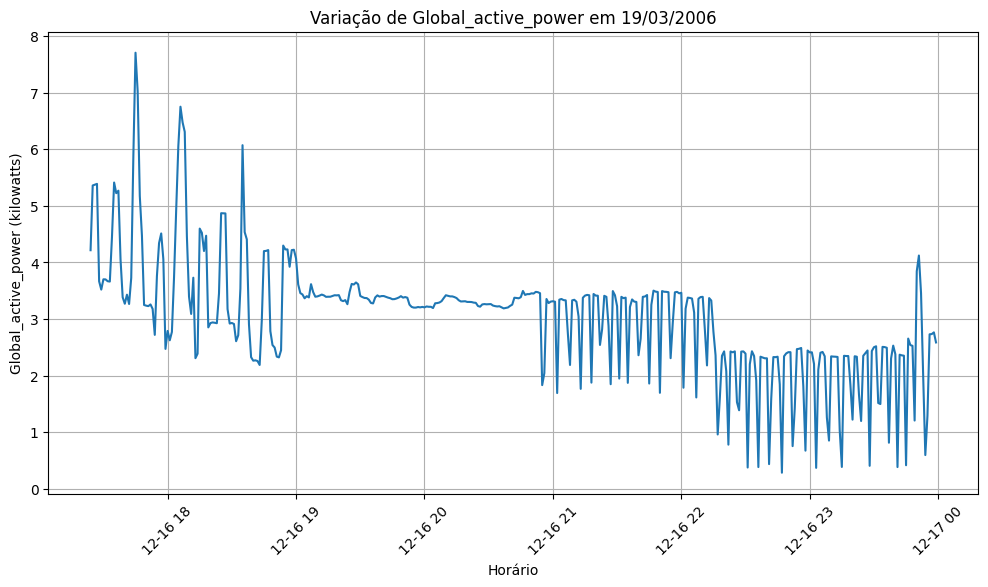

In [ ]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d/%m/%Y", errors='coerce')
dataset["DateTime"] = pd.to_datetime(dataset["Date"].dt.strftime("%d/%m/%Y") + " " + dataset["Time"], format="%d/%m/%Y %H:%M:%S", errors='coerce')

#filtrando dia 19/03/2006
dia_escolhido = dataset[dataset["Date"] == "2006-12-16"]

# grafico
plt.figure(figsize=(12,6))
plt.plot(dia_escolhido["DateTime"], dia_escolhido["Global_active_power"], linestyle='-')
plt.title("Variação de Global_active_power em 19/03/2006")
plt.xlabel("Horário")
plt.ylabel("Global_active_power (kilowatts)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Exercício 7 Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

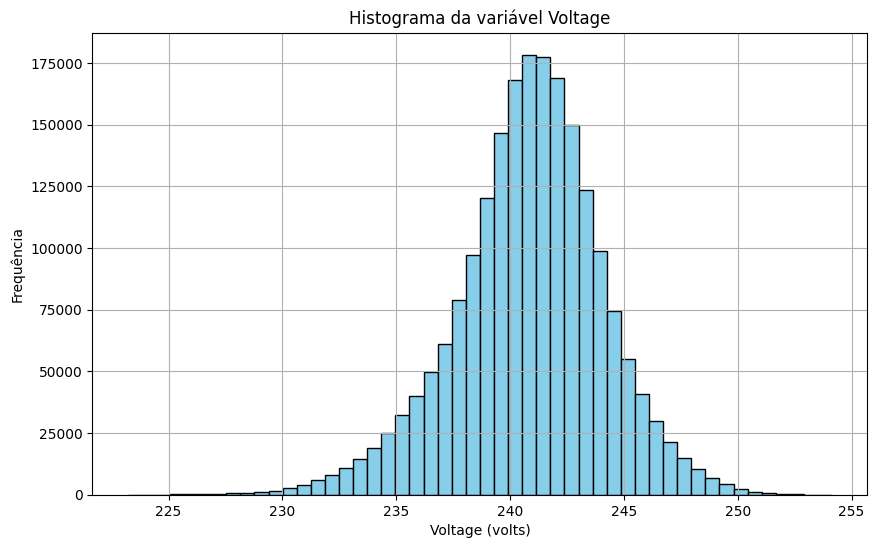

In [ ]:
dataset["Voltage"] = pd.to_numeric(dataset["Voltage"], errors='coerce')
dataset_clean = dataset.dropna(subset=["Voltage"])

#histograma
plt.figure(figsize=(10,6))
plt.hist(dataset_clean["Voltage"], bins=50, color='skyblue', edgecolor='black')
plt.title("Histograma da variável Voltage")
plt.xlabel("Voltage (volts)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

Resposta exercício 7: A maior parte dos valores de Voltage está próxima de 240 V, e são bem simétrica e compoucos outliers, mostrando que a rede doméstica é estável.

In [ ]:
Exercício 8  Calcule o consumo médio por mês em todo o período disponível no dataset

In [ ]:
dataset['AnoMes'] = dataset['Date'].dt.to_period('M')

consumo_medio_mensal = dataset.groupby('AnoMes')['Global_active_power'].mean()
print(consumo_medio_mensal.head())

AnoMes
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64


Exercício 9 Identifique o dia com maior consumo de energia ativa global (Global_active_power).


In [ ]:
consumo_diario = dataset.groupby(dataset['Date'].dt.date)['Global_active_power'].sum()

#dia com mais consumo
dia_maior_consumo = consumo_diario.idxmax()
maior_valor = consumo_diario.max()
print("Dia com maior consumo no Global_active_power:", dia_maior_consumo)
print("Valor total de consumo nesse dia (kilowatts):", maior_valor)

Dia com maior consumo no Global_active_power: 2006-12-23
Valor total de consumo nesse dia (kilowatts): 4773.386


Exercício 10 Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.


In [ ]:
dataset['DiaSemana'] = dataset['Date'].dt.dayofweek
dataset['TipoDia'] = dataset['DiaSemana'].apply(lambda x: 'Fim de Semana' if x >= 5 else 'Dia de Semana')
consumo_medio_tipo = dataset.groupby('TipoDia')['Global_active_power'].mean()
print(consumo_medio_tipo)

TipoDia
Dia de Semana    1.035472
Fim de Semana    1.234232
Name: Global_active_power, dtype: float64


Exercício 11 Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,
Voltage e Global_intensity

In [ ]:
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
for col in colunas:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
dataset_clean = dataset.dropna(subset=colunas)

correlacao = dataset_clean[colunas].corr()
print(correlacao)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


Exercício 12 Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.


In [ ]:
sub_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in sub_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset['Total_Sub_metering'] = dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3']
dataset[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head()


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


Exercício 13 Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.

In [ ]:
media_global_ativa = dataset.groupby('AnoMes')['Global_active_power'].mean()
soma_sub_mensal = dataset.groupby('AnoMes')['Total_Sub_metering'].sum()

# meses que utlrapassa = Total_Sub_metering ultrapassa a média de Global_active_power
meses_ultrapassam = soma_sub_mensal[soma_sub_mensal > media_global_ativa].index
print("Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(meses_ultrapassam)

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
PeriodIndex(['2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05',
             '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11',
             '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05',
             '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11',
             '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05',
             '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11',
             '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
             '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11'],
            dtype='period[M]', name='AnoMes')


Exercício 14 Faça um gráfico de série temporal do Voltage para o ano de 2008.

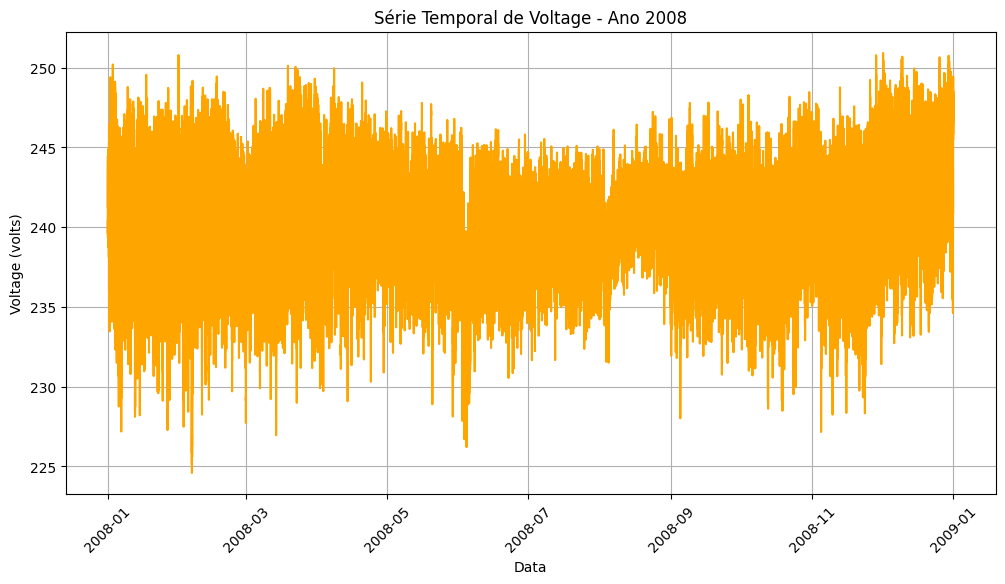

In [ ]:
dataset_2008 = dataset[dataset['Date'].dt.year == 2008]

# grafico série temporal de Voltage
plt.figure(figsize=(12,6))
plt.plot(dataset_2008['DateTime'], dataset_2008['Voltage'], linestyle='-', color='orange')
plt.title("Série Temporal de Voltage - Ano 2008")
plt.xlabel("Data")
plt.ylabel("Voltage (volts)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Exercício 15  Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [ ]:
dataset['Mes'] = dataset['Date'].dt.month

#meses em 'Verão' e 'Inverno' (Hemisfério Norte)
def estação_mes(mes):
    if mes in [6, 7, 8]:
        return 'Verão'
    elif mes in [12, 1, 2]:
        return 'Inverno'
    else:
        return 'Outros'

dataset['Estacao'] = dataset['Mes'].apply(estação_mes)
consumo_estacao = dataset.groupby('Estacao')['Global_active_power'].mean()
print(consumo_estacao)


Estacao
Inverno    1.417623
Outros     1.118732
Verão      0.726682
Name: Global_active_power, dtype: float64


Exercício 16 Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de
Global_active_power é semelhante à da base completa.


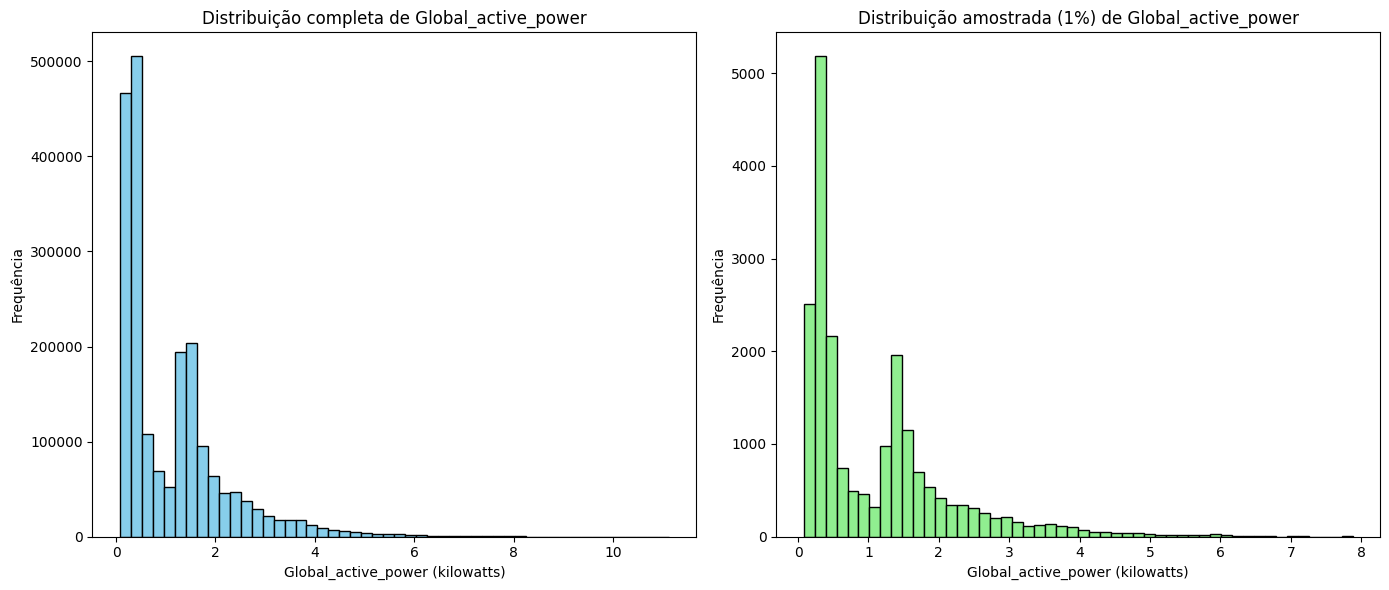

In [ ]:
amostra = dataset.sample(frac=0.01, random_state=42)

plt.figure(figsize=(14,6))

# Histograma base completa
plt.subplot(1, 2, 1)
plt.hist(dataset['Global_active_power'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição completa de Global_active_power")
plt.xlabel("Global_active_power (kilowatts)")
plt.ylabel("Frequência")

# Histograma amostra
plt.subplot(1, 2, 2)
plt.hist(amostra['Global_active_power'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribuição amostrada (1%) de Global_active_power")
plt.xlabel("Global_active_power (kilowatts)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

Exercício 17 Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis
numéricas principais.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

variaveis_numericas = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

for col in variaveis_numericas:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')
dataset_limpo = dataset.dropna(subset=variaveis_numericas)

# Min-Max Scaling
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dataset[variaveis_numericas])

dados_norm = pd.DataFrame(dados_normalizados, columns=variaveis_numericas)
dados_norm.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


Exercício 18  Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.
Interprete os resultados

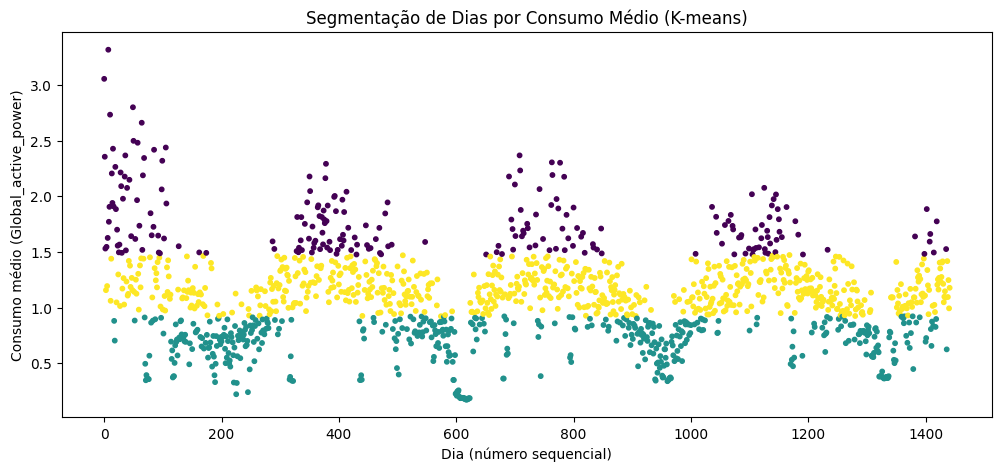

Média de consumo em cada cluster:
Cluster
0    1.778346
1    0.672857
2    1.171545
Name: Consumo_medio, dtype: float64

Quantidade de dias em cada cluster:
Cluster
2    720
1    500
0    222
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

consumo_diario = dataset.groupby("Date")["Global_active_power"].mean()
consumo_diario = consumo_diario.fillna(consumo_diario.mean())
consumo_numerico = pd.DataFrame({
    "Dia": np.arange(len(consumo_diario)),
    "Consumo_medio": consumo_diario.values
})

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
consumo_numerico["Cluster"] = kmeans.fit_predict(consumo_numerico[["Consumo_medio"]])

plt.figure(figsize=(12,5))
plt.scatter(consumo_numerico["Dia"], consumo_numerico["Consumo_medio"], c=consumo_numerico["Cluster"], cmap="viridis", s=10)
plt.title("Segmentação de Dias por Consumo Médio (K-means)")
plt.xlabel("Dia (número sequencial)")
plt.ylabel("Consumo médio (Global_active_power)")
plt.show()
print("Média de consumo em cada cluster:")
print(consumo_numerico.groupby("Cluster")["Consumo_medio"].mean())
print("\nQuantidade de dias em cada cluster:")
print(consumo_numerico["Cluster"].value_counts())


Exercício 19  Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses.

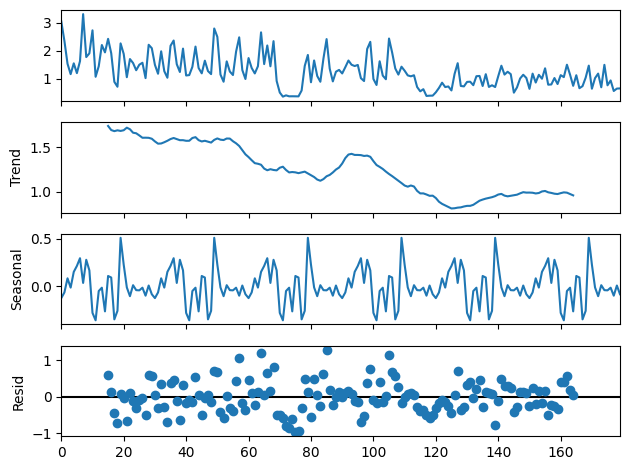

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


serie_diaria = dataset.groupby("Date")["Global_active_power"].mean()
serie_diaria = serie_diaria.fillna(serie_diaria.mean())
serie_numerica = pd.Series(serie_diaria.values, index=np.arange(len(serie_diaria)))
periodo = serie_numerica[:180]
decomposicao = sm.tsa.seasonal_decompose(periodo, model="additive", period=30)
decomposicao.plot()
plt.show()


Exercício 20 Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo.

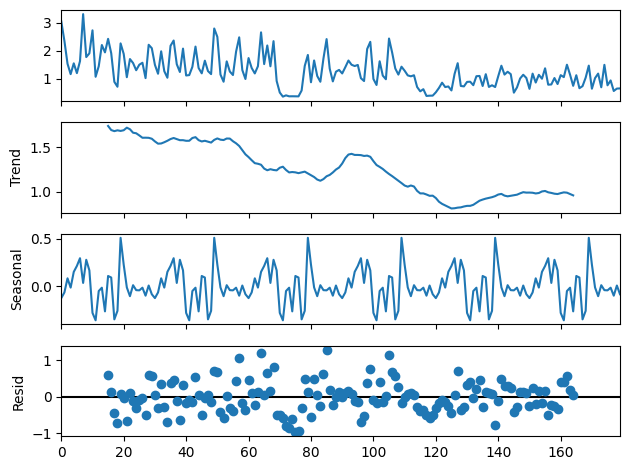

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

serie_diaria = dataset.groupby("Date")["Global_active_power"].mean()
serie_diaria = serie_diaria.fillna(serie_diaria.mean())
serie_numerica = pd.Series(serie_diaria.values, index=np.arange(len(serie_diaria)))
periodo = serie_numerica[:180]
decomposicao = sm.tsa.seasonal_decompose(periodo, model="additive", period=30)  # período mensal aproximado
decomposicao.plot()
plt.show()


In [ ]:
Parte 2

Exercício 21  Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

/tmp/ipython-input-941856134.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-941856134.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-941856134.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-941856134.py:16: FutureWarning: 'H'

Consumo médio por hora do dia (em kW):
 datetime_index
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

---
A hora do dia com o maior consumo médio é: 20h, com um consumo de 1.90 kW.


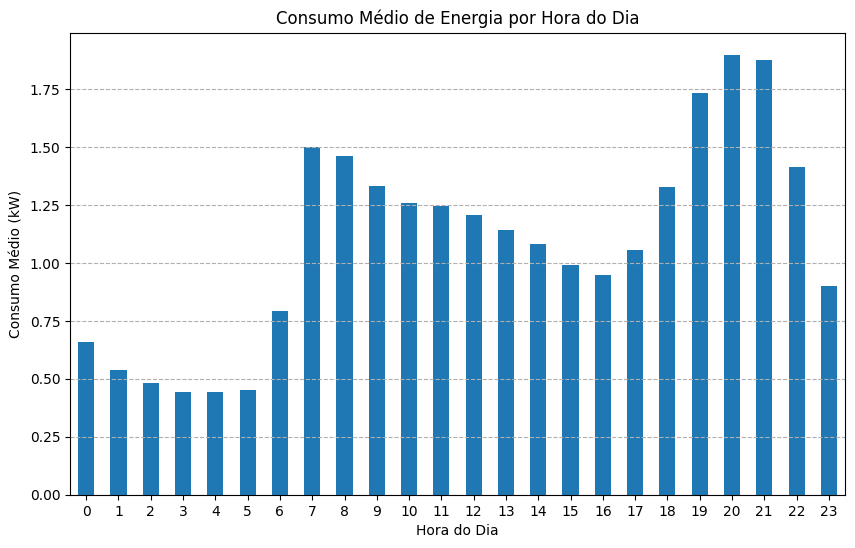

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates={'datetime_index': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], index_col='datetime_index')
for col in df.columns: df[col] = pd.to_numeric(df[col], errors='coerce')
df_hourly = df['Global_active_power'].resample('H').mean().dropna()

hourly_average_consumption = df_hourly.groupby(df_hourly.index.hour).mean()

max_consumption_hour = hourly_average_consumption.idxmax()
max_consumption_value = hourly_average_consumption.max()
print("Consumo médio por hora do dia (em kW):\n", hourly_average_consumption)
print("\n---")
print(f"A hora do dia com o maior consumo médio é: {max_consumption_hour}h, com um consumo de {max_consumption_value:.2f} kW.")

plt.figure(figsize=(10, 6))
hourly_average_consumption.plot(kind='bar')
plt.title('Consumo Médio de Energia por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio (kW)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Exercício 22 Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?


/tmp/ipython-input-3558843437.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-3558843437.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-3558843437.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-3558843437.py:16: FutureWarning:

Autocorrelação com lag de 1 hora: 0.7133
Autocorrelação com lag de 24 horas: 0.4352
Autocorrelação com lag de 48 horas: 0.3990


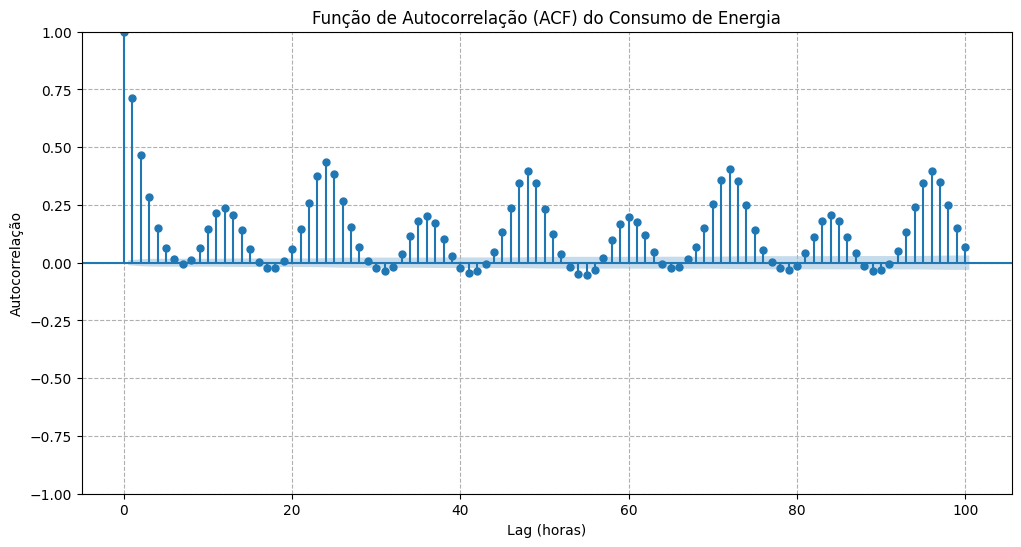

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates={'datetime_index': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], index_col='datetime_index')

for col in df.columns: df[col] = pd.to_numeric(df[col], errors='coerce')

df_hourly = df['Global_active_power'].resample('H').mean().dropna()

autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)
print(f"Autocorrelação com lag de 1 hora: {autocorr_1h:.4f}")
print(f"Autocorrelação com lag de 24 horas: {autocorr_24h:.4f}")
print(f"Autocorrelação com lag de 48 horas: {autocorr_48h:.4f}")

fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df_hourly, lags=100, ax=ax)
plt.title('Função de Autocorrelação (ACF) do Consumo de Energia')
plt.xlabel('Lag (horas)')
plt.ylabel('Autocorrelação')
plt.grid(True, linestyle='--')
plt.show()

Resposta: Sim, a autocorrelação indica que existem padrões diários repetidos.

Exercício 23 Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

/tmp/ipython-input-3688442452.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-3688442452.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-3688442452.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,


Variância explicada por cada componente principal:
PC1: 59.10%
PC2: 22.72%
Total: 81.82%


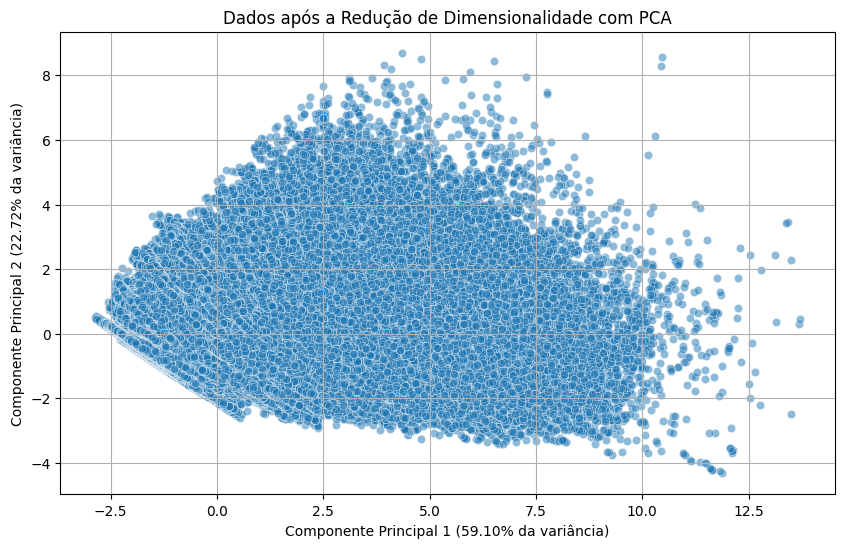

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
                 parse_dates={'datetime_index': ['Date', 'Time']},
                 infer_datetime_format=True,
                 na_values=['?'],
                 index_col='datetime_index')

for col in df.columns: df[col] = pd.to_numeric(df[col], errors='coerce')

features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_features = df[features].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:")
print(f"PC1: {explained_variance[0]*100:.2f}%")
print(f"PC2: {explained_variance[1]*100:.2f}%")
print(f"Total: {(explained_variance[0] + explained_variance[1])*100:.2f}%")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('Dados após a Redução de Dimensionalidade com PCA')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]*100:.2f}% da variância)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]*100:.2f}% da variância)')
plt.grid(True)
plt.show()

Exercício 24 Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

/tmp/ipython-input-2952439052.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-2952439052.py:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/tmp/ipython-input-2952439052.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
/usr/local/lib/python3.12/dist-packages/IPython/cor

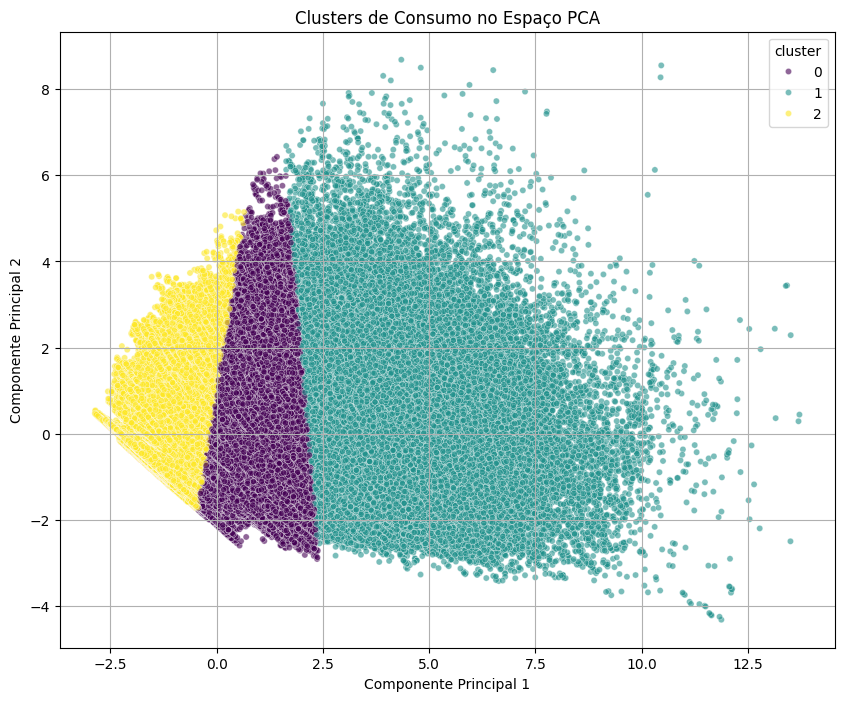

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, parse_dates={'datetime_index': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], index_col='datetime_index')

for col in df.columns: df[col] = pd.to_numeric(df[col], errors='coerce')
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_features = df[features].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df['cluster'] = kmeans.fit_predict(pca_df)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=20, alpha=0.6)
plt.title('Clusters de Consumo no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

Rsposta: os grupos tendem a se separar de forma razoavelmente clara.

Exercício 25 Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

--- Análise da Regressão Linear ---
RMSE (Linear): 0.9708

--- Análise da Regressão Polinomial ---
RMSE (Polinomial): 0.9664


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


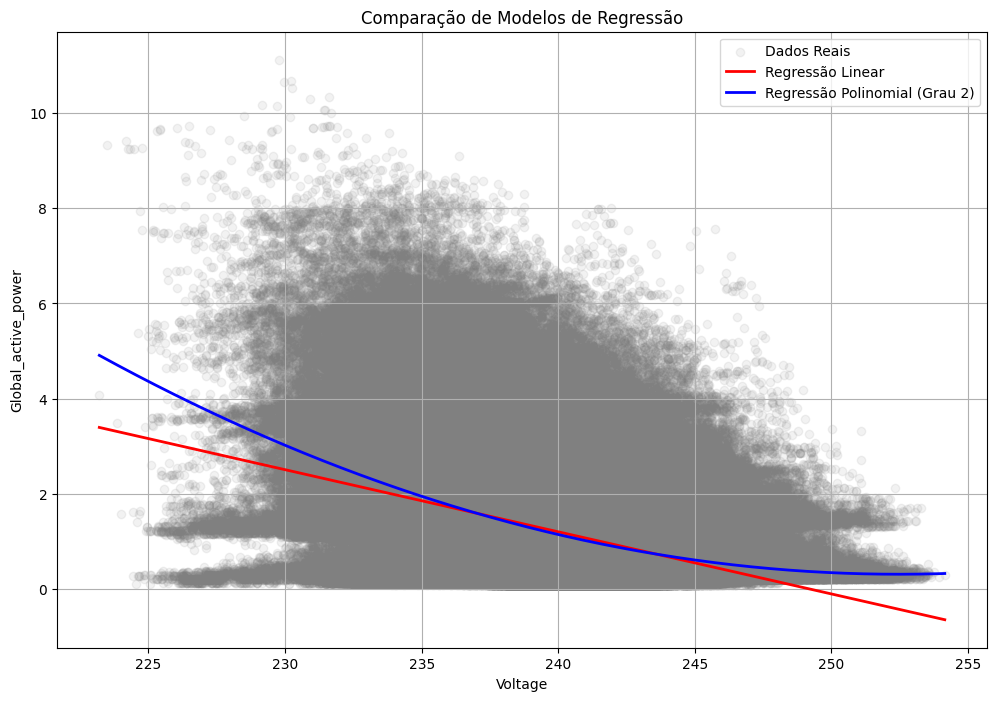

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')

df_filtered = df[['Global_active_power', 'Voltage']].dropna()

X = df_filtered[['Voltage']]
y = df_filtered['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print("--- Análise da Regressão Linear ---")
print(f"RMSE (Linear): {rmse_linear:.4f}")

poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("\n--- Análise da Regressão Polinomial ---")
print(f"RMSE (Polinomial): {rmse_poly:.4f}")

X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

y_plot_linear = linear_model.predict(X_plot)
y_plot_poly = poly_model.predict(poly_features.transform(X_plot))

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='gray', alpha=0.1, label='Dados Reais')
plt.plot(X_plot, y_plot_linear, color='red', label='Regressão Linear', linewidth=2)
plt.plot(X_plot, y_plot_poly, color='blue', label='Regressão Polinomial (Grau 2)', linewidth=2)
plt.title('Comparação de Modelos de Regressão')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.grid(True)
plt.show()

Parte 3 novo data set

Exercício 26 Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

In [ ]:
import pandas as pd
import numpy as np

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')

print("--- Informações sobre o DataFrame ---")
df.info()
print("\n--- Estatísticas Descritivas ---")
print(df.describe())

--- Informações sobre o DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    99992 non-null   float64
 3   Global_reactive_power  99992 non-null   float64
 4   Voltage                99992 non-null   float64
 5   Global_intensity       99992 non-null   float64
 6   Sub_metering_1         99992 non-null   float64
 7   Sub_metering_2         99992 non-null   float64
 8   Sub_metering_3         99992 non-null   float64
dtypes: float64(7), object(2)
memory usage: 6.9+ MB

--- Estatísticas Descritivas ---
       Global_active_power  Global_reactive_power       Voltage  \
count         99992.000000           99992.000000  99992.000000   
mean              1.646354               0.128431 

Exercício 27 Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?


/tmp/ipython-input-1532428734.py:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


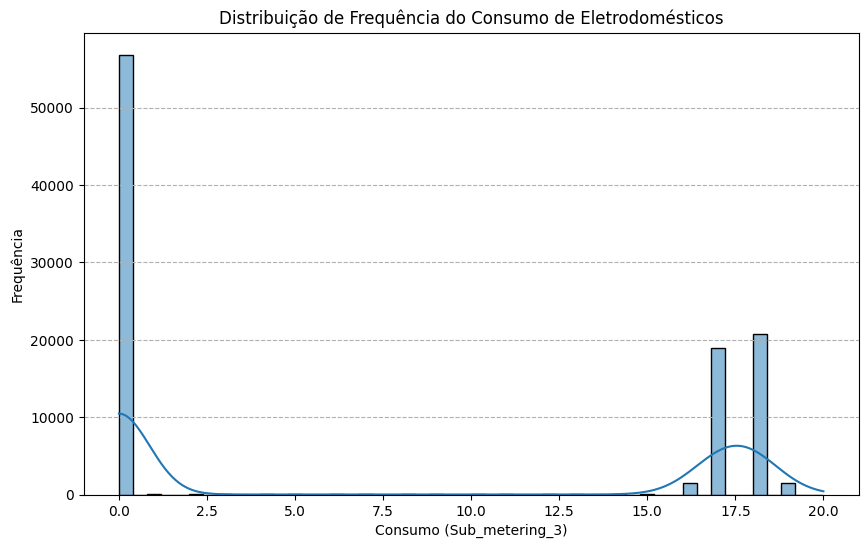

/tmp/ipython-input-1532428734.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df['Sub_metering_3'].resample('15T').mean()


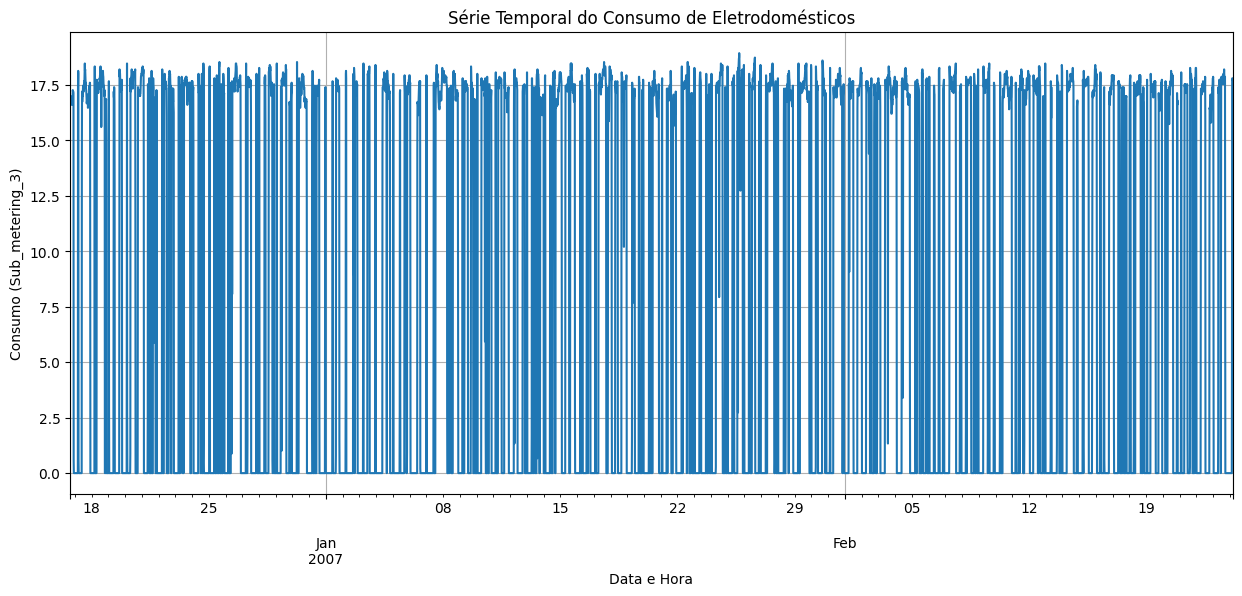

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')
df.dropna(subset=['Sub_metering_3'], inplace=True)

df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('datetime', inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Sub_metering_3'], bins=50, kde=True)
plt.title('Distribuição de Frequência do Consumo de Eletrodomésticos')
plt.xlabel('Consumo (Sub_metering_3)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--')
plt.show()

df_resampled = df['Sub_metering_3'].resample('15T').mean()

plt.figure(figsize=(15, 6))
df_resampled.plot()
plt.title('Série Temporal do Consumo de Eletrodomésticos')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo (Sub_metering_3)')
plt.grid(True)
plt.show()

Resposta: O consumo tende a se concentrar em valores baixos.

Exercício 28 Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [ ]:
import pandas as pd

n_rows_to_read = 100000
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Sub_metering_3', 'Global_active_power', 'Global_intensity', 'Voltage'], inplace=True)

correlations = df[['Sub_metering_3', 'Global_active_power', 'Global_intensity', 'Voltage']].corr()
print("--- Matriz de Correlação ---")
print(correlations)
print("\n--- Correlações de Appliances (Sub_metering_3) com outras variáveis ---")
print(correlations['Sub_metering_3'].sort_values(ascending=False))

--- Matriz de Correlação ---
                     Sub_metering_3  Global_active_power  Global_intensity  \
Sub_metering_3             1.000000             0.544368          0.534891   
Global_active_power        0.544368             1.000000          0.998928   
Global_intensity           0.534891             0.998928          1.000000   
Voltage                   -0.420529            -0.633190         -0.639747   

                      Voltage  
Sub_metering_3      -0.420529  
Global_active_power -0.633190  
Global_intensity    -0.639747  
Voltage              1.000000  

--- Correlações de Appliances (Sub_metering_3) com outras variáveis ---
Sub_metering_3         1.000000
Global_active_power    0.544368
Global_intensity       0.534891
Voltage               -0.420529
Name: Sub_metering_3, dtype: float64


Resposta: s fatores com maior relação com o consumo de eletrodomésticos (Sub_metering_3) são a potência ativa global (Global_active_power) e a intensidade global (Global_intensity).

Exercício 29 Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])
for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

numerical_cols = df.select_dtypes(include=['float64']).columns
df_to_scale = df[numerical_cols]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=numerical_cols)
print("--- DataFrame Original (Amostra) ---")
print(df_to_scale.head())
print("\n--- DataFrame Normalizado (Amostra) ---")
print(df_normalized.head())
print("\n--- Estatísticas do DataFrame Normalizado ---")
print(df_normalized.describe())

--- DataFrame Original (Amostra) ---
   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0  

--- DataFrame Normalizado (Amostra) ---
   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             0.436415               0.478261  0.402340          0.429268   

Exercício 30  PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?



Variância explicada por cada componente principal:
PC1: 73.98%
PC2: 12.81%
Total: 86.78%


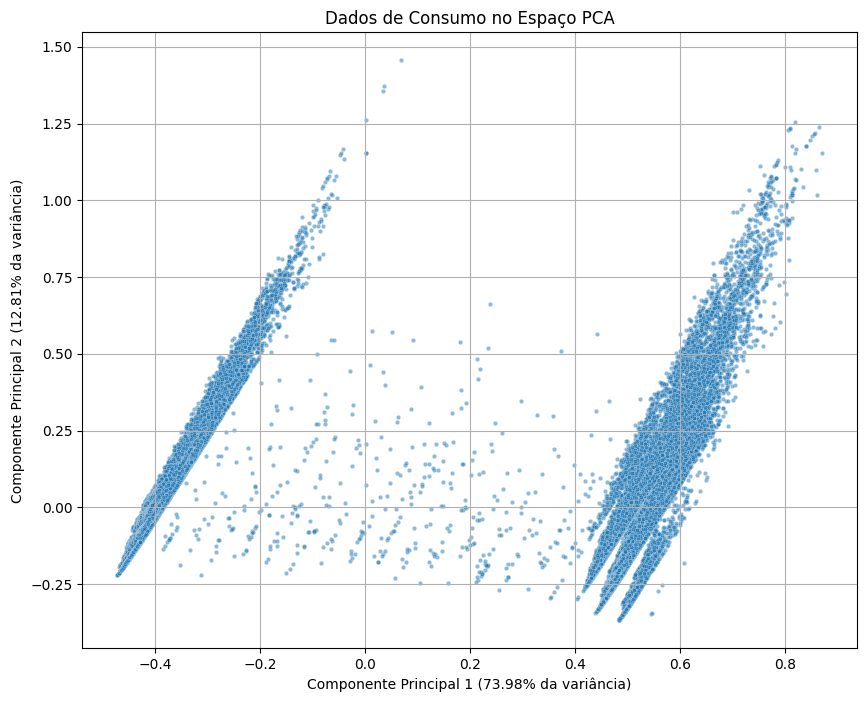

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])
for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

numerical_cols = df.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:")
print(f"PC1: {explained_variance[0]*100:.2f}%")
print(f"PC2: {explained_variance[1]*100:.2f}%")
print(f"Total: {(explained_variance[0] + explained_variance[1])*100:.2f}%")
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5, s=10)
plt.title('Dados de Consumo no Espaço PCA')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]*100:.2f}% da variância)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]*100:.2f}% da variância)')
plt.grid(True)
plt.show()

Resposta: Geralmente, no contexto deste dataset, você verá uma grande nuvem de pontos concentrada em uma área. Essa nuvem principal representa a maioria dos momentos em que o consumo de energia é baixo ou moderado.

Exercício 31 Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

X = df[['Global_active_power', 'Global_intensity', 'Voltage']]
y = df['Sub_metering_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("--- Avaliação da Regressão Linear Múltipla ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"RMSE (Erro Médio da Previsão): {rmse:.4f}")

--- Avaliação da Regressão Linear Múltipla ---
R² (Coeficiente de Determinação): 0.3516
RMSE (Erro Médio da Previsão): 6.9817


Exercício 32 Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])
for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

X = df[['Global_active_power', 'Global_intensity', 'Voltage']]
y = df['Sub_metering_3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("--- Comparação de Modelos de Regressão ---")
print(f"RMSE (Regressão Linear): {rmse_linear:.4f}")
print(f"RMSE (Random Forest Regressor): {rmse_rf:.4f}")

--- Comparação de Modelos de Regressão ---
RMSE (Regressão Linear): 6.9817
RMSE (Random Forest Regressor): 5.4195


Exercício 33 K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

features = ['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Voltage']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_3'] = kmeans.fit_predict(X_scaled)

print("--- Perfis de Consumo com 3 Clusters (Médias) ---")
cluster_profiles_3 = df.groupby('cluster_3')[features].mean()
print(cluster_profiles_3)


--- Perfis de Consumo com 3 Clusters (Médias) ---
           Global_active_power  Global_reactive_power  Global_intensity  \
cluster_3                                                                 
0                     3.916767               0.221827         16.629352   
1                     0.530249               0.107355          2.305057   
2                     1.932520               0.113750          8.074172   

              Voltage  
cluster_3              
0          236.522868  
1          243.368015  
2          239.813701  


Exercício 34 Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

n_rows_to_read = 100000

df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])


for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

median_appliances = df['Sub_metering_3'].median()

df['consumo_alto'] = (df['Sub_metering_3'] > median_appliances).astype(int)

X = df[['Global_active_power', 'Global_intensity', 'Voltage']]
y = df['consumo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
print("--- Avaliação da Regressão Logística ---")
print(f"Acurácia: {accuracy_log_reg:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))
print("\n--- Avaliação do Random Forest Classifier ---")
print(f"Acurácia: {accuracy_rf_clf:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf_clf))

--- Avaliação da Regressão Logística ---
Acurácia: 0.7334

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     17037
           1       0.70      0.67      0.69     12961

    accuracy                           0.73     29998
   macro avg       0.73      0.73      0.73     29998
weighted avg       0.73      0.73      0.73     29998


--- Avaliação do Random Forest Classifier ---
Acurácia: 0.8731

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     17037
           1       0.83      0.89      0.86     12961

    accuracy                           0.87     29998
   macro avg       0.87      0.88      0.87     29998
weighted avg       0.88      0.87      0.87     29998



Exercício 35 Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

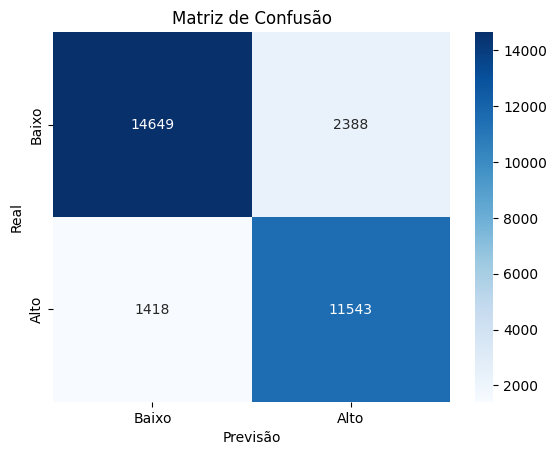


--- Métricas de Avaliação ---
Acurácia: 0.8731
Precisão: 0.8286
Recall: 0.8906
F1-Score: 0.8585


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

n_rows_to_read = 100000
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

for col in df.columns[2:]: df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

median_appliances = df['Sub_metering_3'].median()
df['consumo_alto'] = (df['Sub_metering_3'] > median_appliances).astype(int)

X = df[['Global_active_power', 'Global_intensity', 'Voltage']]
y = df['consumo_alto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Alto'], yticklabels=['Baixo', 'Alto'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("\n--- Métricas de Avaliação ---")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Resposta:o modelo erra mais para a classe baixo consumo

Parte 4

Exercício 36 Importação e visualização inicial
- Use o widget CSV File Import para carregar o dataset Individual Household Electric Power
Consumption.
- Conecte ao widget Data Table para visualizar as primeiras linhas.
- Pergunta: quantas variáveis e registros aparecem?


In [ ]:
import pandas as pd

file_path = 'household_power_consumption.txt'

n_rows_to_read = 10000

try:
    df = pd.read_csv(file_path, sep=';', low_memory=False, nrows=n_rows_to_read)
    print("--- Primeiras 5 linhas do DataFrame ---")
    print(df.head())

    num_registros, num_variaveis = df.shape

    print("\n--- Informações do Dataset ---")
    print(f"O dataset possui {num_registros} registros.")
    print(f"O dataset possui {num_variaveis} variáveis.")

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Colab antes de executar o código.")

--- Primeiras 5 linhas do DataFrame ---
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  

--- Informações do Dataset ---
O dataset possui 10000 registros.
O dataset possui 9 vari

Resposta: o dataset possui 9 variáveis

Exercício 37 Amostragem de dados (1%)
- Use o widget Sample Data para selecionar uma amostra de 1% dos registros.
- Pergunta: a distribuição de Global_active_power na amostra é semelhante à base completa?
- Consulte: https://orangedatamining.com/widget-catalog/


Resposta: "Sim, a amostra mantém o padrão geral da base, com a maioria dos valores em faixas baixas de consumo.

Exercício 38 Distribuição do consumo
- Conecte ao widget Distribution e visualize Global_active_power.
- Pergunta: o consumo é concentrado em valores baixos ou há muitos registros de alto
consumo?


Resposta: A maioria dos consumos é baixa, com poucos casos de valores altos que aparecem com pouca frequência.

Exercício 39 Relação entre variáveis elétricas
- Use o widget Scatter Plot para analisar Voltage (X) vs Global_intensity (Y).
- Pergunta: existe correlação visível?

Resposta: Há uma leve correlação negativa entre voltagem e intensidade, mas os pontos estão bem dispersos, sem uma relação forte.

Exercício 40 Clustering com K-Means
- Aplique o widget k-Means com 3 clusters.
- Use como atributos Sub_metering_1, Sub_metering_2, Sub_metering_3.
- Visualize os grupos no Scatter Plot.
- Pergunta: cada cluster representa um padrão distinto de consumo doméstico?

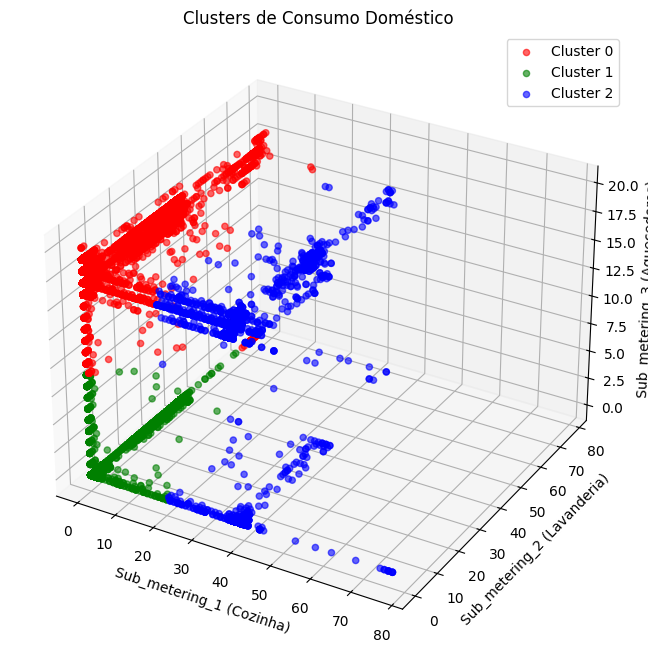


--- Perfis de Consumo por Cluster (Médias) ---
         Sub_metering_1  Sub_metering_2  Sub_metering_3
cluster                                                
0              0.174542        2.943829       17.513419
1              0.043164        1.017642        0.021164
2             36.988175        4.428441       12.707095


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

n_rows_to_read = 100000
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, nrows=n_rows_to_read, na_values=['?'])

metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in metering_cols: df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=metering_cols, inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[metering_cols])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for i in range(3): ax.scatter(df[df['cluster'] == i]['Sub_metering_1'], df[df['cluster'] == i]['Sub_metering_2'], df[df['cluster'] == i]['Sub_metering_3'], c=colors[i], label=f'Cluster {i}', alpha=0.6)

ax.set_xlabel('Sub_metering_1 (Cozinha)')
ax.set_ylabel('Sub_metering_2 (Lavanderia)')
ax.set_zlabel('Sub_metering_3 (Aquecedores)')
ax.set_title('Clusters de Consumo Doméstico')
plt.legend()
plt.show()

print("\n--- Perfis de Consumo por Cluster (Médias) ---")
cluster_profiles = df.groupby('cluster')[metering_cols].mean()
print(cluster_profiles)

Resposta: Sim, os clusters representam padrões de consumo distintos.